In [8]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

In [9]:
adata = sc.read_h5ad("Archived/Output_230907_adata_scvi_random_sampleID_hvg.h5ad")

In [10]:
adata

AnnData object with n_obs × n_vars = 393064 × 5000
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Dataset_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cluster_main_colors', 'hvg', 'leiden', 'leiden_0.5_colors', 'leiden_0.7_colors', 'leiden_1.0_colors', 'leiden_scvi_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts'
    obsp: 'connectivities', 'distances'

In [11]:
#sc.tl.leiden(adata_hvg, key_added = "leiden_0.5",resolution=0.5) # 590 m -> 22m -> 7m
sc.tl.leiden(adata, key_added = "leiden_0.6",resolution=0.6)
#sc.tl.leiden(adata_hvg, key_added = "leiden_0.7",resolution=0.7) 
sc.tl.leiden(adata, key_added = "leiden_0.8",resolution=0.8)
sc.tl.leiden(adata, key_added = "leiden_0.9",resolution=0.9)
#sc.tl.leiden(adata_hvg, key_added = "leiden_1.0",resolution=1.0) 

In [17]:
sc.settings.n_jobs = 30
sc.set_figure_params(figsize=(4,5), vector_friendly = True)

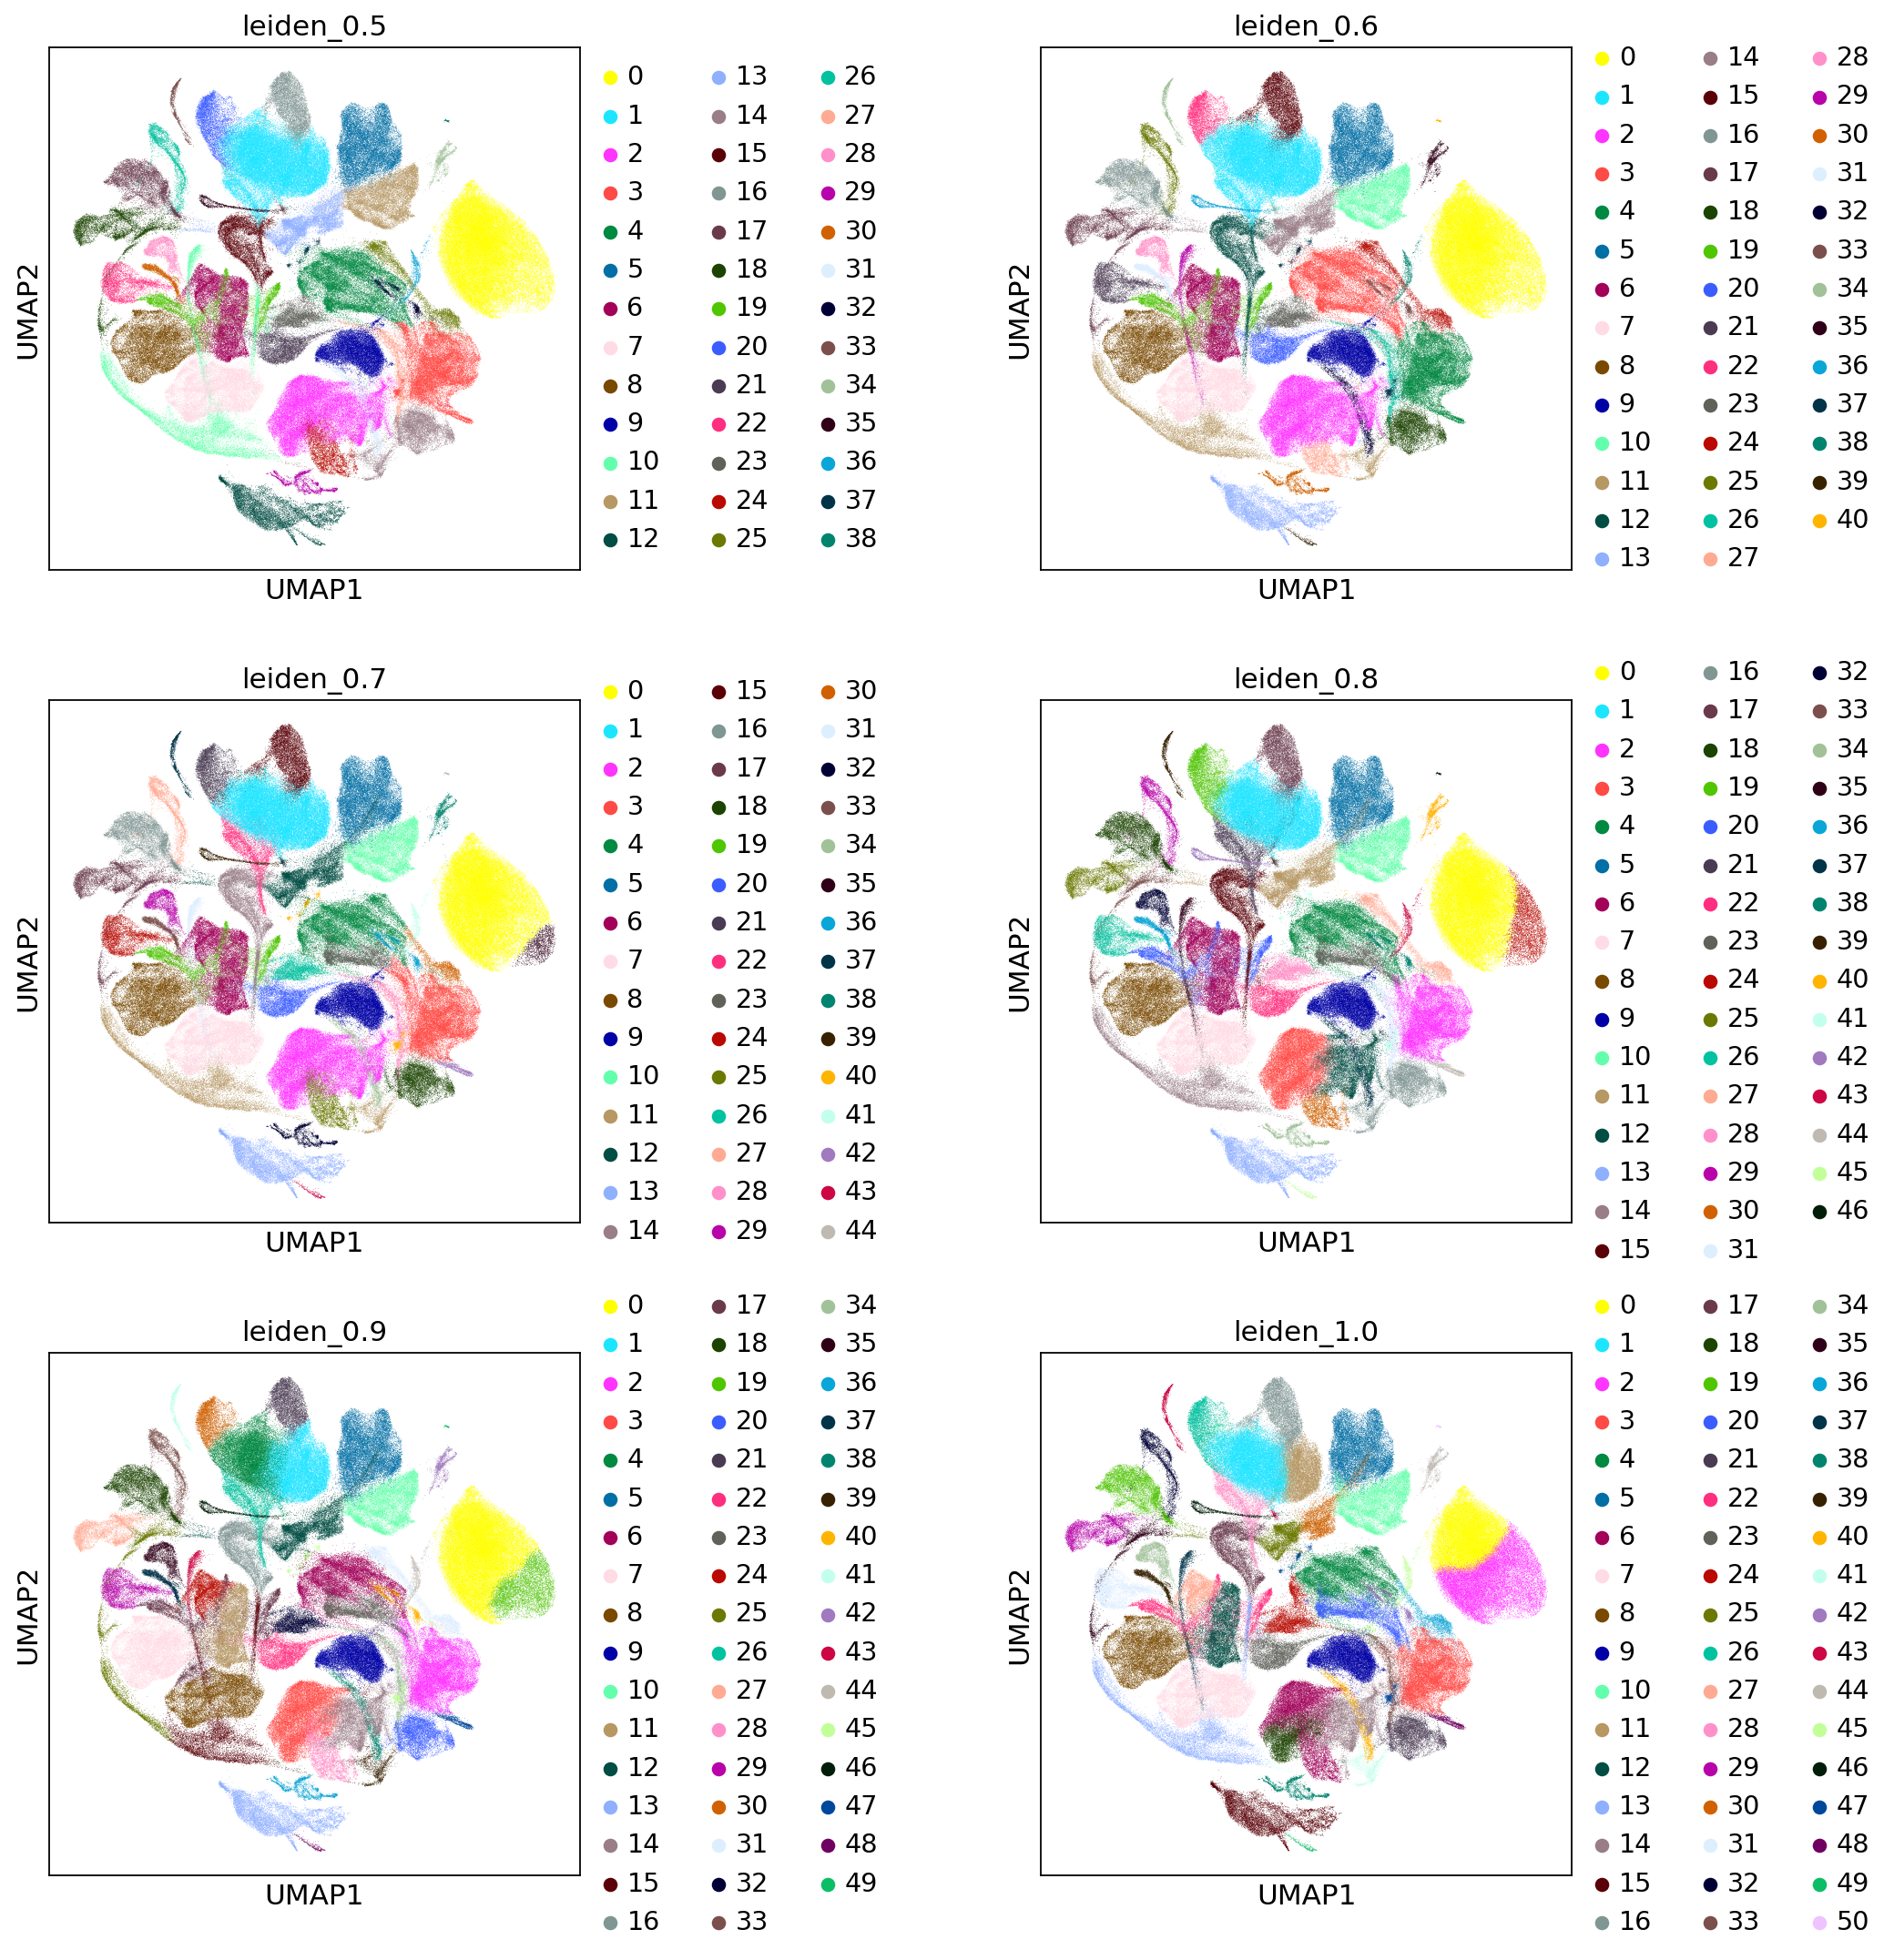

In [18]:
sc.pl.umap(adata, color = ["leiden_0.5", "leiden_0.6", "leiden_0.7", "leiden_0.8", "leiden_0.9", "leiden_1.0"], 
           ncols = 2, wspace = 0.7)

In [19]:
adata.write_h5ad("Data/Output_240204_adata_scvi_random_sampleID.h5ad")

In [2]:
# adata = sc.read_h5ad("Data/Output_231215_adata_scvi_random_sampleID.h5ad") # 12m, 100G

In [3]:
adata

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'X_scvi_batch', 'X_scvi_labels', 'leiden_scvi', 'Leiden'
    uns: 'Brain_Region3_colors', 'Brain_Region_colors', 'Leiden_colors', 'Stage2_colors', 'Stage_colors', 'cluster_main2_colors', 'cluster_main_colors', 'leiden_scvi_colors', 'log1p'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts', 'scaled'

In [6]:
marker_genes_dict = {
	'Excitatory': ['SLC17A7', 'LINC00507', 'RORB', 'THEMIS', 'FEZF2'],
	'Inhibitory': ['GAD1', 'ADARB2', 'PAX6', 'LAMP5', 'VIP', 'LHX6', 'SST', 'PVALB'],
    'Non-neuronal': ['SLC1A3', 'PDGFRA', 'FGFR3', 'OPALIN', 'NOSTRIN', 'TYROBP'],
    'RG': ['HES1', 'CDK1', 'SOX2'],
    #'IPC': ['HOPX, EF1'],
    'Neuroblast': ['NHLH1', 'NEUROD6'],
    'Immature Neuron': ['INA', 'NHLH2'],
    'Glioblast': ['TNC', 'BCAN']
}

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: C0, C1, C2, etc.
var_group_labels: Excitatory, Inhibitory, Non-neuronal, etc.


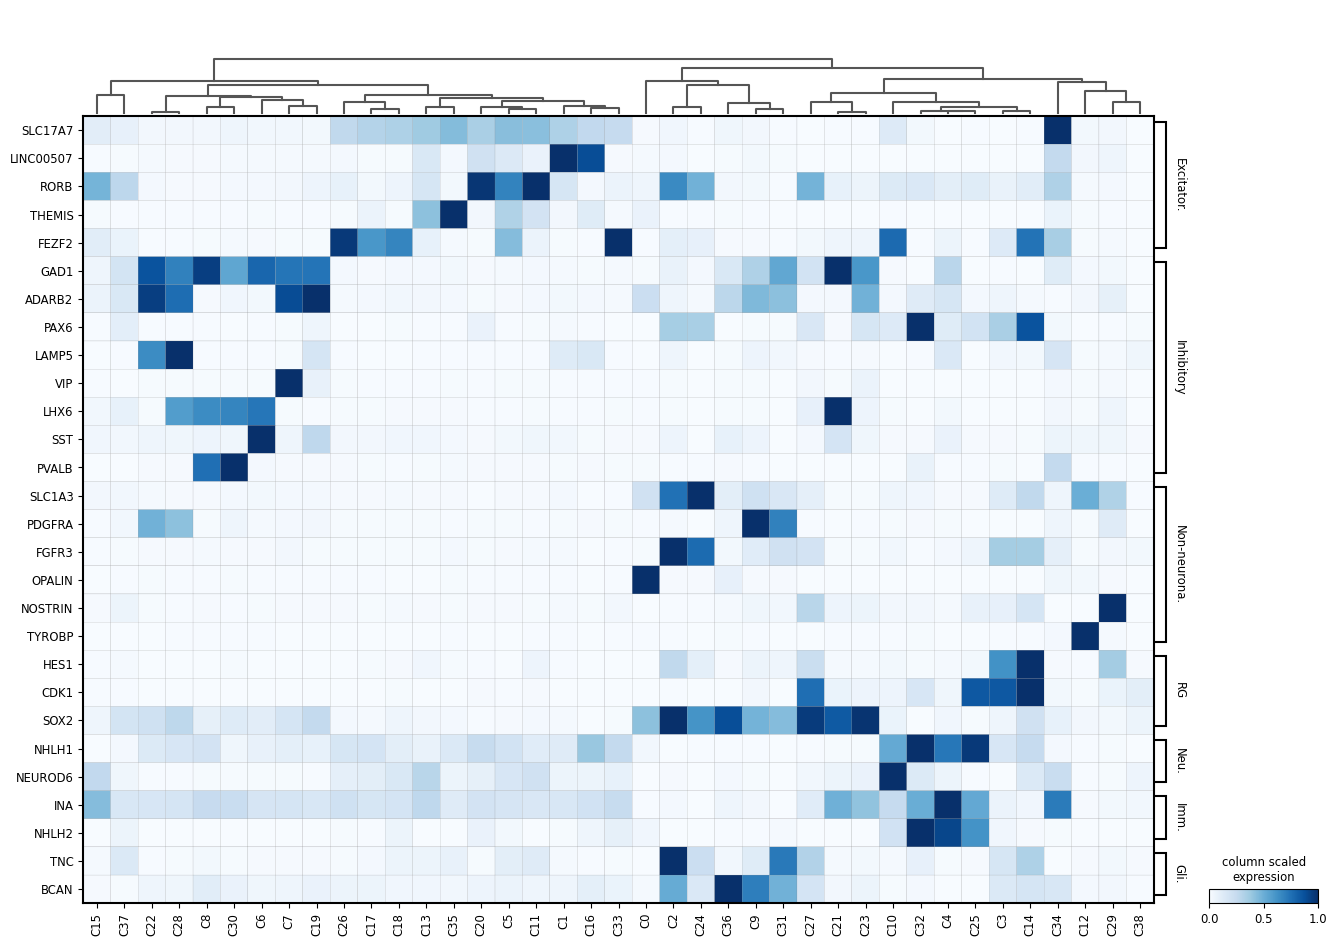

In [7]:
sc.pl.matrixplot(adata, marker_genes_dict, 
                 groupby='Leiden', dendrogram=True, cmap='Blues', 
                 standard_scale='var', 
                 swap_axes = True,
                 colorbar_title='column scaled\nexpression') # 30m

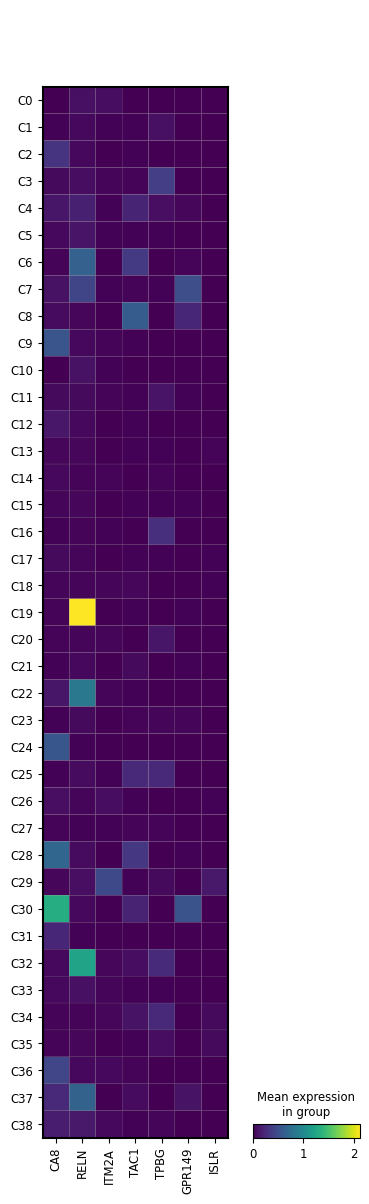

In [6]:
markers = ['CA8', 'RELN', 'ITM2A', 'TAC1', 'TPBG', 'GPR149', 'ISLR']
sc.pl.matrixplot(adata, markers, groupby='Leiden', dendrogram=False)

In [4]:
del adata.obsm['_scvi_extra_categorical_covs']

In [5]:
adata.write_h5ad("Data/Output_231215_adata_scvi_random_sampleID_forSeurat.h5ad")